In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from src.model import DataPreprocessing, Models

Using TensorFlow backend.


In [2]:
train_data = pd.read_pickle('data/df_merged_learn.pkl')
holdout_data = pd.read_pickle('data/df_merged_test.pkl')

In [3]:
y = train_data.pop('income').values
X = train_data.values

In [4]:
y.shape

(145776,)

In [5]:
X.shape

(145776, 406)

In [5]:
X_train_scaled, X_test_scaled, y_train, y_test = DataPreprocessing(X, y).split_and_standardize_data()

In [11]:
print(f"Size of X train: {X_train_scaled.shape}")
print(f"Size of X test: {X_test_scaled.shape}")
print(f"Size of y train: {y_train.shape}")
print(f"Size of y test: {y_test.shape}")

Size of X train: (109332, 406)
Size of X test: (36444, 406)
Size of y train: (109332,)
Size of y test: (36444,)


### Logistic Regression

First try a logistic regression with a standard train/test split.

In [3]:
log_model = LogisticRegression()

Models(log_model, X, y).model_data()

Accuracy: 0.9298649983536385
Recall: 0.6745311554748942
Precision: 0.35588892435365466
F1 score: 0.4659423318010866
RMSE: 0.26483013734535865


/Users/michellelee/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Try cross validation to see if that improves performance

In [4]:
Models(log_model, X, y).kfolds_cv()

/Users/michellelee/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/michellelee/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

Accuracy: 0.9261263892500142
Recall: 0.2756843897357617
Precision: 0.6523215922983445
F1 score: 0.3863667710720025
RMSE: 0.2717809007996218


/Users/michellelee/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


KFolds doesn't seem to help. Try PCA to see if that improves performance.

In [5]:
Models(log_model, X, y, pca=True).model_data()

Accuracy: 0.9194929206453737
Recall: 0.6786355475763016
Precision: 0.12065113309926588
F1 score: 0.20487804878048782
RMSE: 0.2837376946311968


Including PCA also does not seem to help.

In [6]:
# Try balancing classes for logistic regression
log_model_balanced = LogisticRegression(class_weight='balanced')

Models(log_model_balanced, X, y).model_data()

Accuracy: 0.8306991548677423
Recall: 0.3191185229303157
Precision: 0.8550909671241621
F1 score: 0.46478140180430255
RMSE: 0.411461839217512


/Users/michellelee/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [7]:
# Try SMOTE
Models(log_model, X, y, smote=True).model_data()

Accuracy: 0.8579898532016451
Recall: 0.8424559186721038
Precision: 0.880670048932785
F1 score: 0.8611392423641995
RMSE: 0.3768423367913362


/Users/michellelee/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Conclusion

**SMOTE has the best performance wrt recall and precision**

### Ensemble Methods

Try a few ensemble methods to see if they are better at classification

In [14]:
rf_model = RandomForestClassifier()

Models(rf_model, X, y).model_data()

Accuracy: 0.9267369114257491
Recall: 0.6481126039667306
Precision: 0.3233322693903607
F1 score: 0.43143100511073257
RMSE: 0.27067155109883806


In [4]:
gb_model = GradientBoostingClassifier()

Models(gb_model, X, y).model_data()

Accuracy: 0.9312369663044672
Recall: 0.6987951807228916
Precision: 0.3517395467602937
RMSE: 0.2622270651468549


In [16]:
ada_model = AdaBoostClassifier()

Models(ada_model, X, y).model_data()

Accuracy: 0.9289869388651081
Recall: 0.6648517846339987
Precision: 0.3507819980849026
F1 score: 0.45925616381111567
RMSE: 0.26648275954532574


In [5]:
Models(gb_model, X, y, smote=True).model_data()

Accuracy: 0.9382936567500225
Recall: 0.9330288290425911
Precision: 0.9443727297289184
RMSE: 0.24840761512074763


#### Conclusion
**Gradient Boosting with SMOTE has best performance**

### Test models on holdout set

Try logistic regression and gradient boosting with SMOTE on unseen data

In [3]:
y_test = holdout_data.pop('income').values
X_test = holdout_data.values

In [8]:
y_test.shape

(75428,)

In [9]:
X_test.shape

(75428, 405)

In [39]:
# There's one less column in test because it's missing ['detailed_household_and_family_stat_ Grandchild <18 ever marr not in subfamily']

In [40]:
Models(log_model, X_test, y_test, smote=True).model_data()

Accuracy: 0.855108877721943
Recall: 0.8458985034319793
Precision: 0.8684225726332814
F1 score: 0.8570125687576594
RMSE: 0.3806456649931232


/Users/michellelee/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
Models(gb_model, X_test, y_test, smote=True).model_data()

Accuracy: 0.9425287356321839
Recall: 0.9397348332663721
Precision: 0.945705539190204
F1 score: 0.9427107323813911
RMSE: 0.23973165074269207


### Feature Importances

In [10]:
X_train_scaled, X_test_scaled, y_train, y_test = DataPreprocessing(X_test, y_test).split_and_standardize_data()
gb_model_feat = GradientBoostingClassifier()
gb_model_feat.fit(X_train_scaled, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [12]:
feat_importances = pd.Series(gb_model_feat.feature_importances_, index=holdout_data.columns)

NameError: name 'plt' is not defined

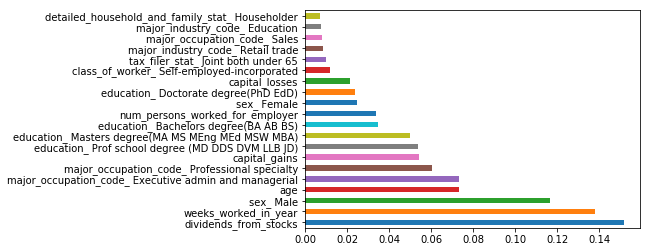

In [14]:
feat_importances.nlargest(20).plot(kind='barh')
plt.show()